In [1]:
import csv

def read_int_from_file_float(file_location):
    numbers = []
    with open(file_location) as tsv:
        for column in zip(*[line for line in csv.reader(tsv, dialect="excel-tab")]):
            for num in column:
                numbers.append(num)
    while '' in numbers:
        numbers.remove('')
    
    #print(numbers)
    print(file_location + " has " + str(len(numbers)) + " of entries.")
    numbers_float = map(float, numbers)
    numbers_float_list = list(numbers_float)
    
    return numbers_float_list

interference_0_list = read_int_from_file_float("no_interference_TCP_minus_80211.txt")
interference_2_list = read_int_from_file_float("2_interference_TCP_minus_80211.txt")

interference_0_list_chunks = [interference_0_list[x:x+20] for x in range(0, len(interference_0_list), 20)]
interference_2_list_chunks = [interference_2_list[x:x+20] for x in range(0, len(interference_2_list), 20)]

no_interference_TCP_minus_80211.txt has 280 of entries.
2_interference_TCP_minus_80211.txt has 280 of entries.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_each_step_latency(chunks_array):
    fig, ax = plt.subplots()
    fig.set_size_inches(20, 8)
    plt.ylabel('Latency (ms)', fontsize=12)
    
    ax.boxplot(chunks_array[0:10])
    ax.set_xticklabels([
        "Start\n<->\nSECC Discovery",
        "SECC Discovery\n<->\nSession Initialized",
        "Session Initialized\n<->\nSupportedAppProtocol",
        "SupportedAppProtocol\n<->\nSessionSetup",
        "SessionSetup\n<->\nServiceDiscovery",
        "ServiceDiscovery\n<->\nPaymentServiceSelection",
        "PaymentServiceSelection\n<->\nPaymentDetail",
        "PaymentDetail\n<->\nAuthorization",
        "Authorization\n<->\nChargeParameterDiscovery",
        "ChargeParameterDiscovery\n<->\nStart Charging"
        ], fontsize=10)
    plt.grid()
    plt.show()

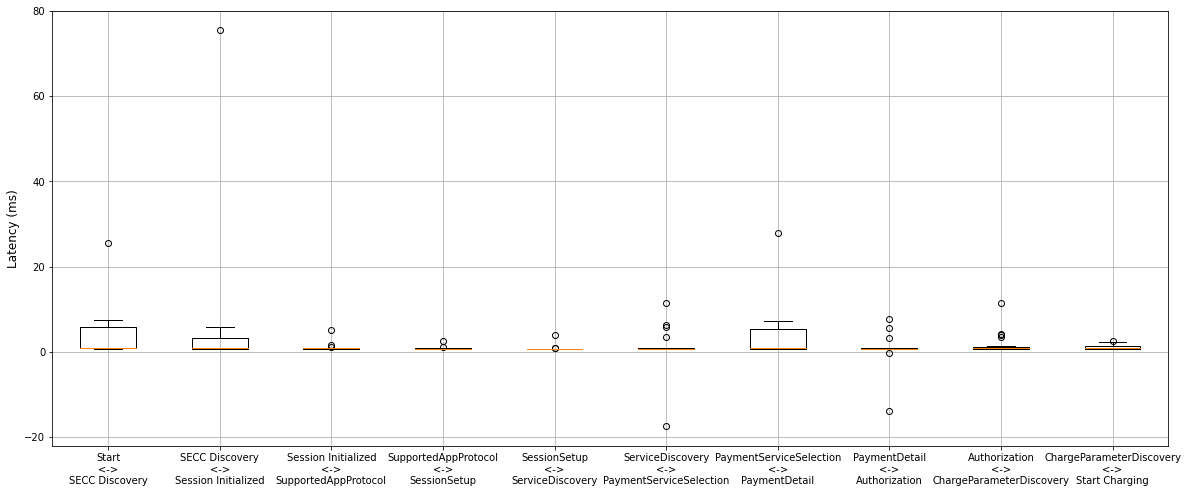

In [3]:
plot_each_step_latency(interference_0_list_chunks)

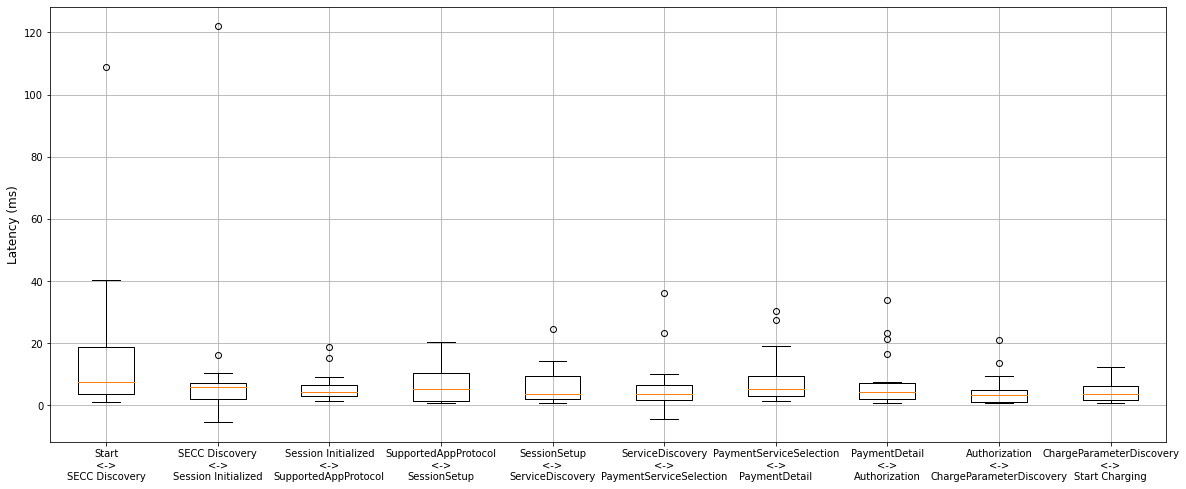

In [4]:
plot_each_step_latency(interference_2_list_chunks)

In [6]:
print(len(interference_0_list_chunks))
print(len(interference_0_list_chunks[0]))

14
20


In [7]:
import pandas as pd

def construct_dataframe(list_chunk, interference_num, index, type_str):
    return pd.DataFrame({'Latency (ms)': list_chunk[index],
                         'Interference': [interference_num for _ in range(len(list_chunk[index]))],
                         'Stage': [index+1 for _ in range(len(list_chunk[index]))],
                         'Type': type_str
                        })

stage_num = 10
interference_0_df = {i: construct_dataframe(interference_0_list_chunks, 0, i, "TCP-Data Link") for i in range(0, stage_num)}
interference_2_df = {i: construct_dataframe(interference_2_list_chunks, 2, i, "TCP-Data Link") for i in range(0, stage_num)}

interference_0_df_all = pd.concat(interference_0_df[i] for i in range(0, stage_num))
interference_2_df_all = pd.concat(interference_2_df[i] for i in range(0, stage_num))

dataframe_all = pd.concat([interference_0_df_all, interference_2_df_all])

[Text(0, 0, 'Start\n<->\nSECC Discovery'),
 Text(1, 0, 'SECC Discovery\n<->\nSession Initialized'),
 Text(2, 0, 'Session Initialized\n<->\nSupportedAppProtocol'),
 Text(3, 0, 'SupportedAppProtocol\n<->\nSessionSetup'),
 Text(4, 0, 'SessionSetup\n<->\nServiceDiscovery'),
 Text(5, 0, 'ServiceDiscovery\n<->\nPaymentServiceSelection'),
 Text(6, 0, 'PaymentServiceSelection\n<->\nPaymentDetail'),
 Text(7, 0, 'PaymentDetail\n<->\nAuthorization'),
 Text(8, 0, 'Authorization\n<->\nChargeParameterDiscovery'),
 Text(9, 0, 'ChargeParameterDiscovery\n<->\nStart Charging')]

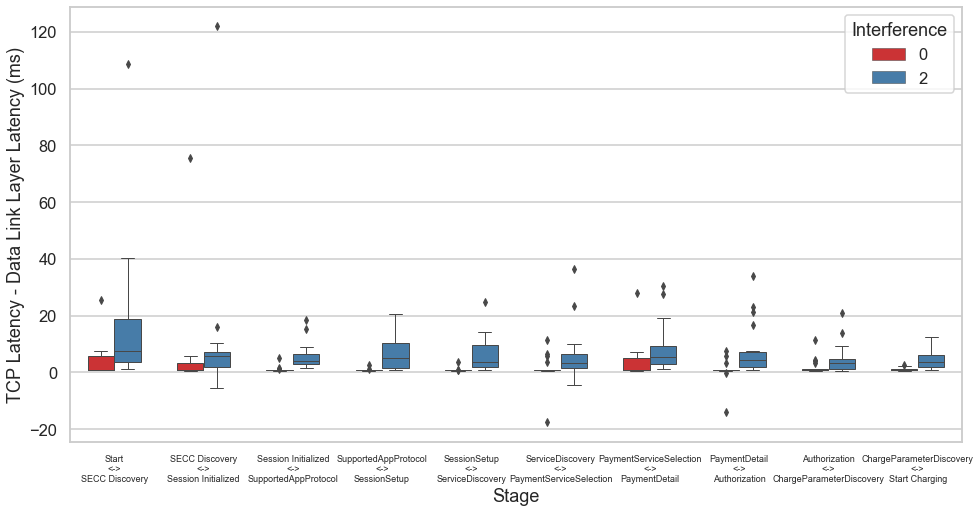

In [9]:
import seaborn as sns

sns.set(rc={'figure.figsize':(16,8)})
#darkgrid, dark, whitegrid, white, ticks
sns.set_style('whitegrid')

#paper, notebook, talk, poster
sns.set_context('talk')
g1 = sns.boxplot(x="Stage", y="Latency (ms)", data=dataframe_all, hue="Interference", width=0.6, linewidth=1.0, palette="Set1")
g1.set_ylabel("TCP Latency - Data Link Layer Latency (ms)")
g1.set_xticklabels([
    "Start\n<->\nSECC Discovery",
    "SECC Discovery\n<->\nSession Initialized",
    "Session Initialized\n<->\nSupportedAppProtocol",
    "SupportedAppProtocol\n<->\nSessionSetup",
    "SessionSetup\n<->\nServiceDiscovery",
    "ServiceDiscovery\n<->\nPaymentServiceSelection",
    "PaymentServiceSelection\n<->\nPaymentDetail",
    "PaymentDetail\n<->\nAuthorization",
    "Authorization\n<->\nChargeParameterDiscovery",
    "ChargeParameterDiscovery\n<->\nStart Charging"
    ], fontsize=9)

In [ ]:
#有可能是 Interference 增加的時候，也會增加封包在 EVCC 網卡 queueing 的時間，這個部分不確定 Wireshark 到底是在哪一個位置收聽到封包